In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime
import time 
from scipy.spatial import distance_matrix

from scipy.stats import norm
# Test average window cnn
from scipy.ndimage import uniform_filter
from scipy.ndimage import gaussian_filter
import skgstat as skg

In [3]:
import os 
import sys
sys.path.insert(0, '/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/src')
from Sinmod import Sinmod
from Cascade import Cascade
from Covariance import Covariance
from plotting.SinmodPlotting import SinmodPlotting

In [4]:
sinmod_path = "/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/data/sinmod/transfer_382450_files_da8d2b9a"
files = ["BioStates_froshelf.nc", "BioStates_midnor.nc"]
plot_test_path = "/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/figures/tests/Sinmod/"

file_ind = 0
logging_kwargs = {
    "print_to_console": True,
    "log_file": plot_test_path + "Sinmod_notebook_log.txt",
    "overwrite_file": True
}
boundary_kwargs = {
    "border_file": "/border_files/cascade_test_xy.csv",
    "file_type": "xy"}

sinmod_c = Sinmod(sinmod_path + "/" + files[file_ind ], 
                        plot_path=plot_test_path,
                        log_kwargs=logging_kwargs,
                        boundary_kwargs=boundary_kwargs,
                      print_while_running=True)

2025-04-20 17:01:53 [INFO] [Sinmod] Setting up Sinmod class
2025-04-20 17:01:53 [INFO] [Sinmod] Setting up boundary
2025-04-20 17:01:53 [INFO] [Sinmod] Boundary kwargs: {'border_file': '/border_files/cascade_test_xy.csv', 'file_type': 'xy'}
2025-04-20 17:01:53 [INFO] [Sinmod] Reading file /Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/data/sinmod/transfer_382450_files_da8d2b9a/BioStates_froshelf.nc
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    title: Current data from SINMOD
    institution: SINTEF Ocean
    grid_mapping: grid_mapping
    grid_mapping_name: polar_stereographic
    straight_vertical_longitude_from_pole: 58.0
    horizontal_resolution: 160.0
    coordinate_north_pole: [13471.  11643.5]
    latitude_of_projection_origin: 90.0
    standard_parallel: 60.0
    barotropic_timestep: 1.3636363636363635
    baroclinic_timestep: 30.0
    _FillValue: -32768
    setup: FroShelf
    relax_e: T
    nested

In [10]:
Sx = sinmod_c.sinmod_data["flatten"]["xc"]
Sy = sinmod_c.sinmod_data["flatten"]["yc"]
calanus = sinmod_c.sinmod_data["flatten"]["calanus_finmarchicus"]
ocean_inds = sinmod_c.sinmod_data["flatten"]["ocean_inds"]
Sx = Sx[ocean_inds]
Sy = Sy[ocean_inds]
calanus = calanus[:, ocean_inds]
print("calanus shape", calanus.shape)

calanus shape (3, 296661)


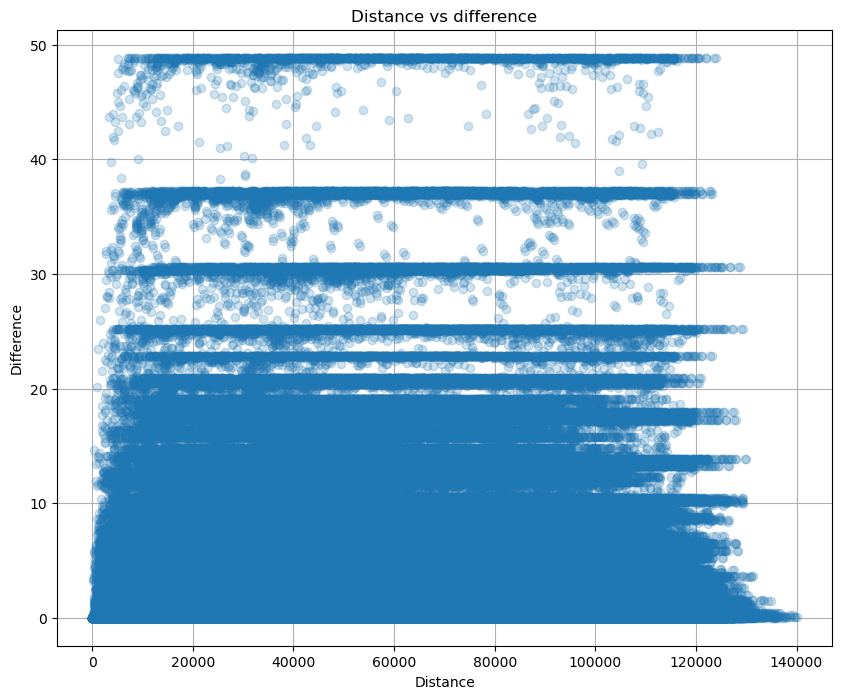

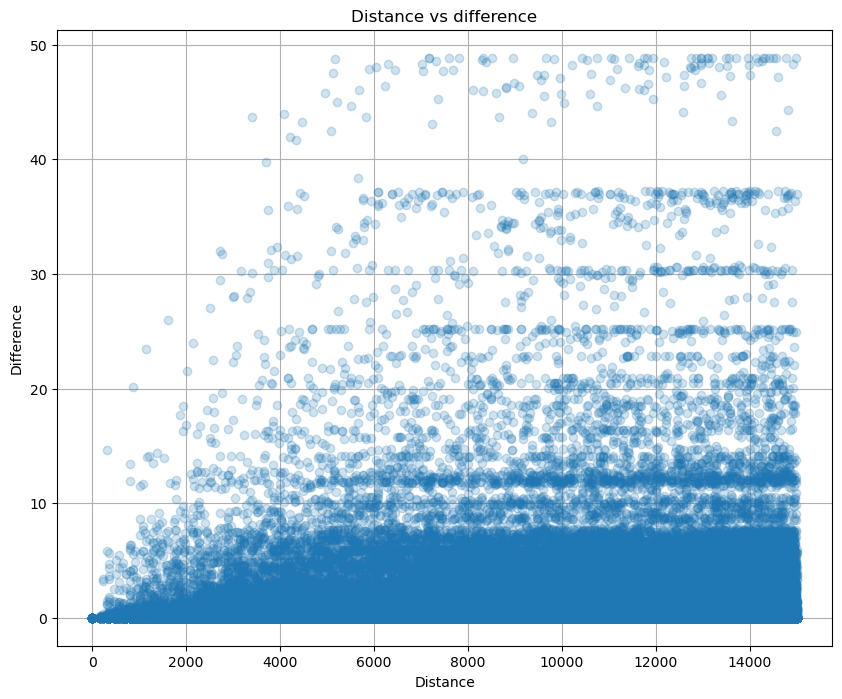

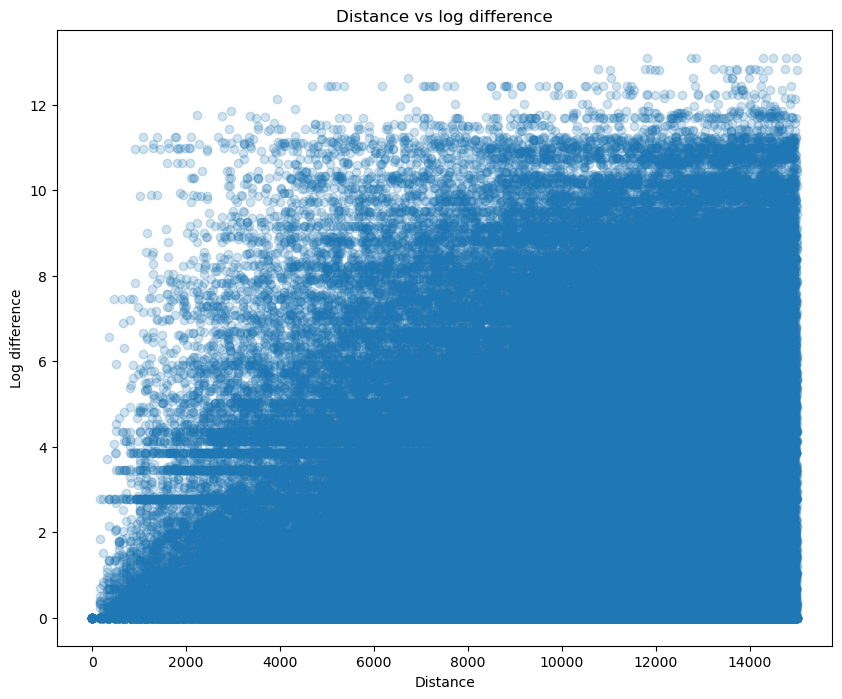

In [33]:
n = 2000
random_inds = np.random.choice(len(Sx), size=n, replace=False)
Sx_rnd = Sx[random_inds]
Sy_rnd = Sy[random_inds]
calanus_rnd = calanus[1, random_inds]
log_calanus_rnd = np.log(calanus_rnd + 0.0001)
S_rnd = np.vstack((Sx_rnd, Sy_rnd)).T
dist =distance_matrix(S_rnd, S_rnd)
diff = np.abs(calanus_rnd[:, None] - calanus_rnd[None, :])
log_diff = np.abs(np.log(calanus_rnd[:, None]+0.0001) - np.log(calanus_rnd[None, :]+0.0001))
d = 15000
short_dist = dist[dist < d]
short_diff = diff[dist < d]
plt.figure(figsize=(10, 8))
plt.plot(dist.flatten(), diff.flatten(), "o", alpha=0.11)
plt.xlabel("Distance")
plt.ylabel("Difference")
plt.title("Distance vs difference")
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(short_dist.flatten(), short_diff.flatten(), "o", alpha=0.11)
plt.xlabel("Distance")
plt.ylabel("Difference")
plt.title("Distance vs difference")
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
short_log_diff = log_diff[dist < d]
plt.plot(short_dist.flatten(),short_log_diff.flatten(), "o", alpha=0.11)

plt.xlabel("Distance")
plt.ylabel("Log difference")
plt.title("Distance vs log difference")
#plt.xscale("log")
plt.show()



## Variogram¨
# Variogram

In [31]:
# get variogram
V

< exponential Semivariogram fitted to 20 bins >

/Users/ajolaise/opt/anaconda3/envs/cascade/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


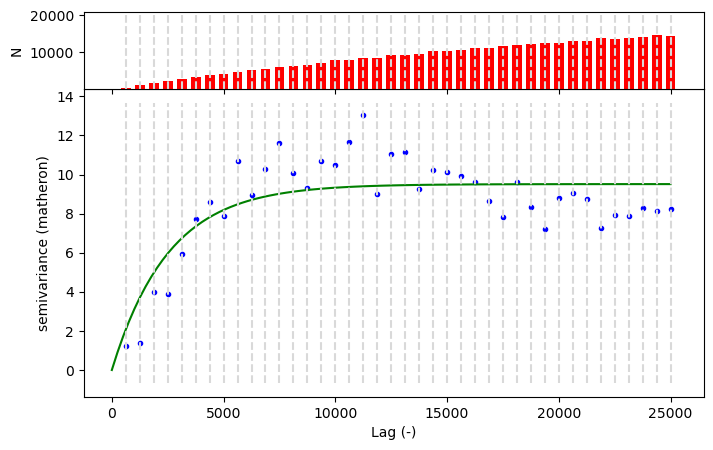

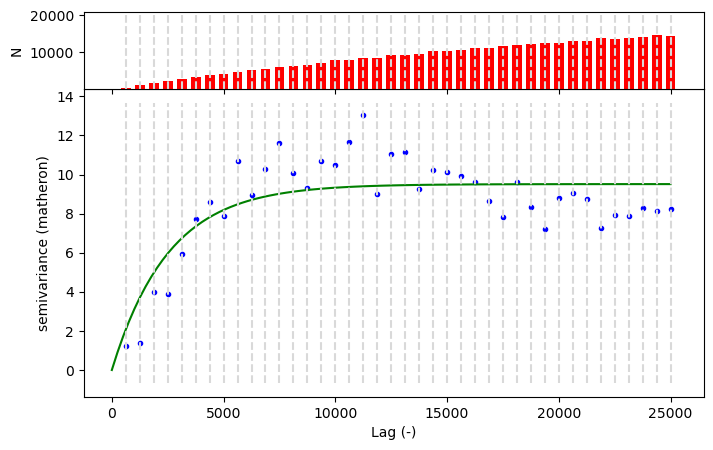

In [ ]:
V = skg.Variogram(S_rnd, calanus_rnd, model="exponential", maxlag=25000, n_lags=40)
V.fit()
V.plot()

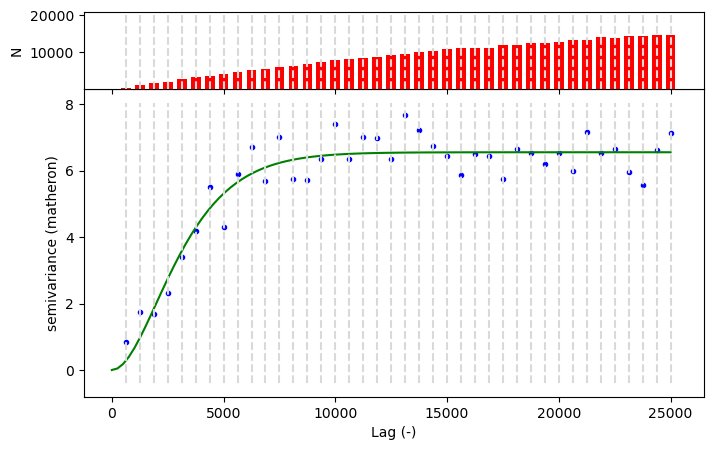

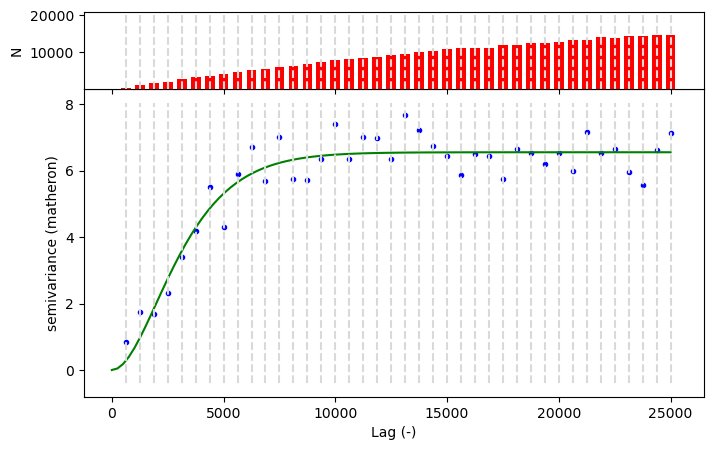

In [39]:
V = skg.Variogram(S_rnd, calanus_rnd, model="matern", maxlag=25000, n_lags=40)
V.fit()
V.plot()

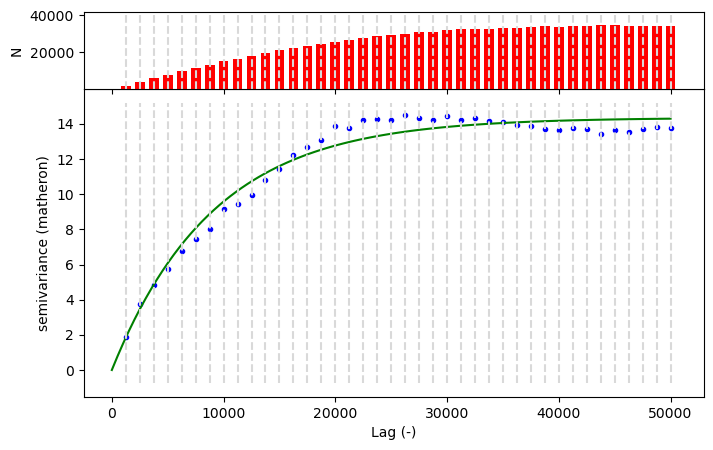

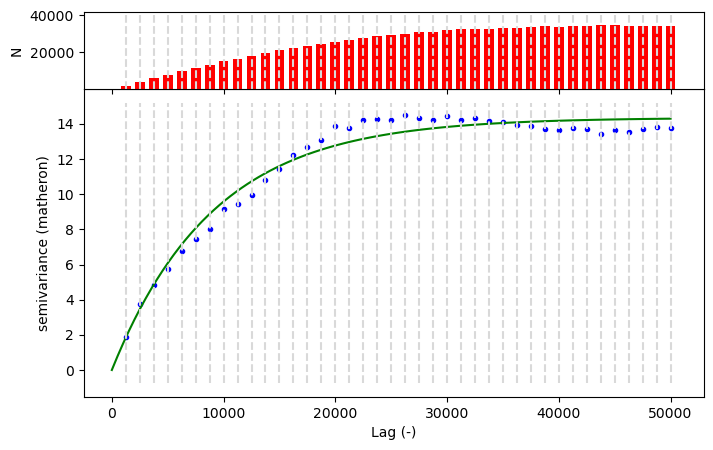

In [35]:
V = skg.Variogram(S_rnd, log_calanus_rnd, model="exponential", maxlag=50000, n_lags=40)
V.fit()
V.plot()

/Users/ajolaise/opt/anaconda3/envs/cascade/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


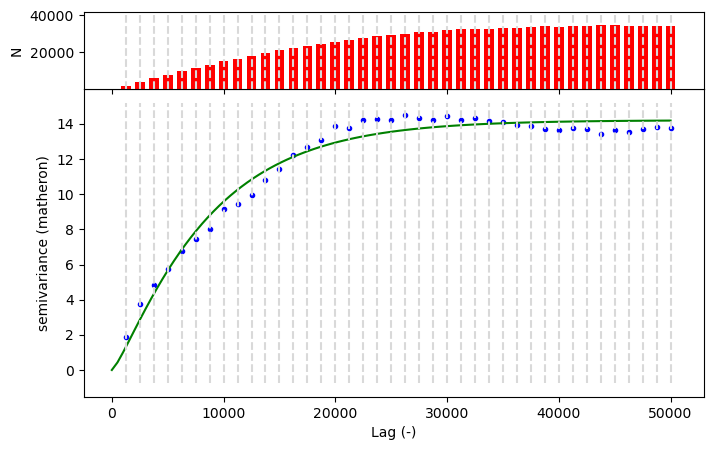

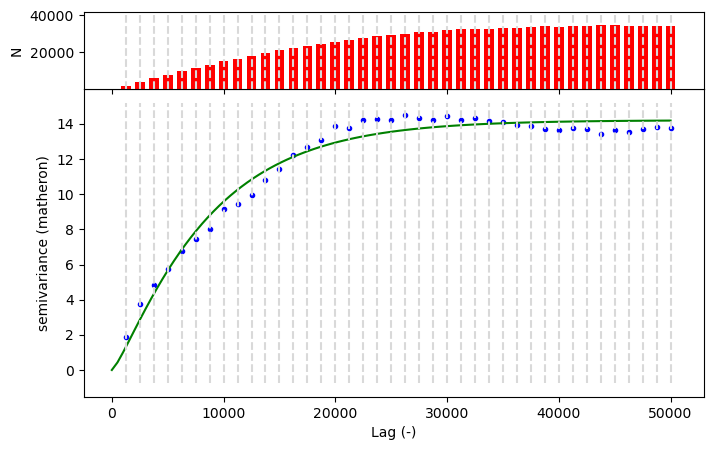

In [38]:
V = skg.Variogram(S_rnd, log_calanus_rnd, model="matern", maxlag=50000, n_lags=40)
V.fit()
V.plot()

